<a href="https://colab.research.google.com/github/AlexeyTri/Mathematics/blob/main/SVD_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод главных компонент

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Класс PCA

In [2]:
class PCA:

  def __init__(self, n_components, solver='covariance'):
    self.n_components = n_components
    self.mean = None
    self.explained_variance = None
    self.solver = solver

  def fit(self, X):

    self.mean = np.mean(X, axis=0)

    if self.solver == 'covariance':
      covariances = (X - self.mean).T.dot((X - self.mean)) / (X.shape[0]-1)
      eigenvalues, eigenvectors = np.linalg.eig(covariances)

      idxs = np.argsort(eigenvalues)[::-1]
      eigenvalues = eigenvalues[idxs]
      eigenvectors = eigenvectors[idxs].T

    elif self.solver == 'svd':
      X = X - self.mean
      U, S, Vt = np.linalg.svd(X)

      eigenvalues, eigenvectors = S**2 / (X.shape[0]-1), Vt

    self.W = eigenvectors[:self.n_components]
    self.explained_variance = np.sum(eigenvalues[:self.n_components]) / np.sum(eigenvalues)

    return self

  def transform(self, X):

    X -= self.mean
    return np.dot(X, self.W.T)

  def transform_inverse(self, X):

    return np.dot(X, self.W) + self.mean

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [4]:
pca = PCA(n_components=2, solver='covariance')
X_pca = pca.fit(X_std).transform(X_std)
print(X_pca.shape, pca.explained_variance)

(150, 2) 0.9581320720000165


In [5]:
pca_svd = PCA(n_components=2, solver='svd')
X_pca_svd = pca_svd.fit(X_std).transform(X_std)
print(X_pca_svd.shape, pca_svd.explained_variance)

(150, 2) 0.9581320720000165


In [6]:
np.allclose(X_pca, X_pca_svd)

True

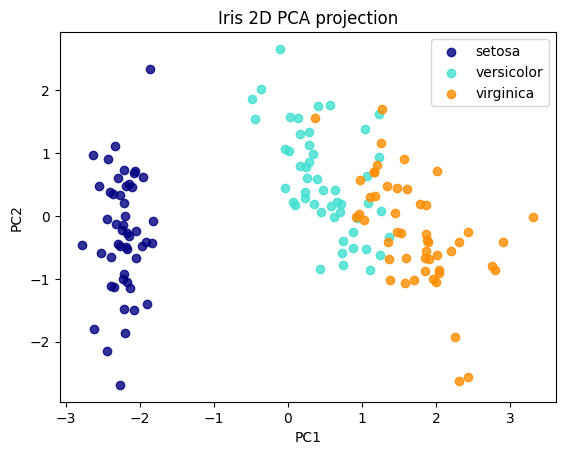

In [7]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

for color, i, class_name in zip(colors, [0, 1, 2], iris.target_names):
  plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, label=class_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title('Iris 2D PCA projection')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

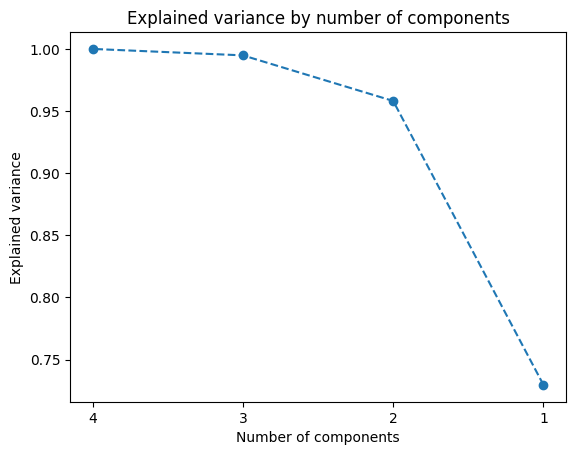

In [8]:
components_range = range(1,5)
explained_vars = [PCA(n_components=i).fit(X_std).explained_variance for i in components_range]
plt.plot(components_range, explained_vars, '--o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.xticks(components_range)
plt.gca().invert_xaxis()
plt.title('Explained variance by number of components')
plt.show()

In [9]:
X_reconstructed = pca.transform_inverse(X_pca)
X_reconstructed[0], X_std[0]

(array([-0.99888895,  1.05319838, -1.30270654, -1.24709825]),
 array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ]))

In [10]:
# данные совпадают при достаточно большом допустимом отклонении
np.allclose(X_reconstructed, X_std, atol=0.8)

True

**ДЗ5:**



1.   Реализовать метод PCA (hande_made) для выборки MNIST - 25
2.   Реализовать метод PCA библиотека pytorch для выборки MNIST - 25 баллов
3. Построить графики зависимости качества предсказания от количества признаков для 1 и 2-го случаев, указать при каком минимальном количестве признаков алгоритм дает результат не ниже 80% - 25 баллов
4. Напишите функции вычисления правой сингулярной матрицы, левой сингулярной матрицы и диагональной сингулярной матрицы, сравните полученный результат с коробочным решеним - 25 баллов

